In [100]:
import rosbag
from geometry_msgs.msg import Point
import pandas as pd
import matplotlib.pyplot as plt
import rospy

In [101]:
bag = rosbag.Bag('/home/uware/rosbags/_2022-02-21-11-12-03.bag')
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t
    distance = msg.transforms[0].transform.translation.z

    # print(msg.transforms[0].header.stamp.secs, msg.transforms[0].header.stamp.nsecs)
    
    # create row
    row={'time': time.to_sec(), 'distance': distance}
    rows.append(row)

df = pd.DataFrame.from_records(rows)
# df

In [102]:
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df


,time,distance,relative_time
0,1.645438e+09,1.540828,0.000000
1,1.645438e+09,1.544104,0.100539
2,1.645438e+09,1.560746,0.190374
3,1.645438e+09,1.584294,0.282790
4,1.645438e+09,1.586674,0.378646
...,...,...,...
566,1.645438e+09,0.525557,26.838087
567,1.645438e+09,0.522651,26.873688
568,1.645438e+09,0.526820,26.908928
569,1.645438e+09,0.525514,26.945567


<AxesSubplot:xlabel='relative_time'>

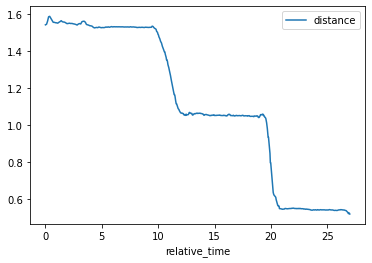

In [103]:
df.plot(x='relative_time', y='distance')